In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0, (1.6437346437346436, 23.479422604422602, 48.628071253071255, 0.0), 4764.5, 50)
(1, (3.4267524644030667, 25.579408543263966, 47.873493975903614, 0.0), 7202.0, 50)
(13, (0.6465049928673324, 29.549936181395, 37.48270891208049, 0.0), 217358.0, 43)


True

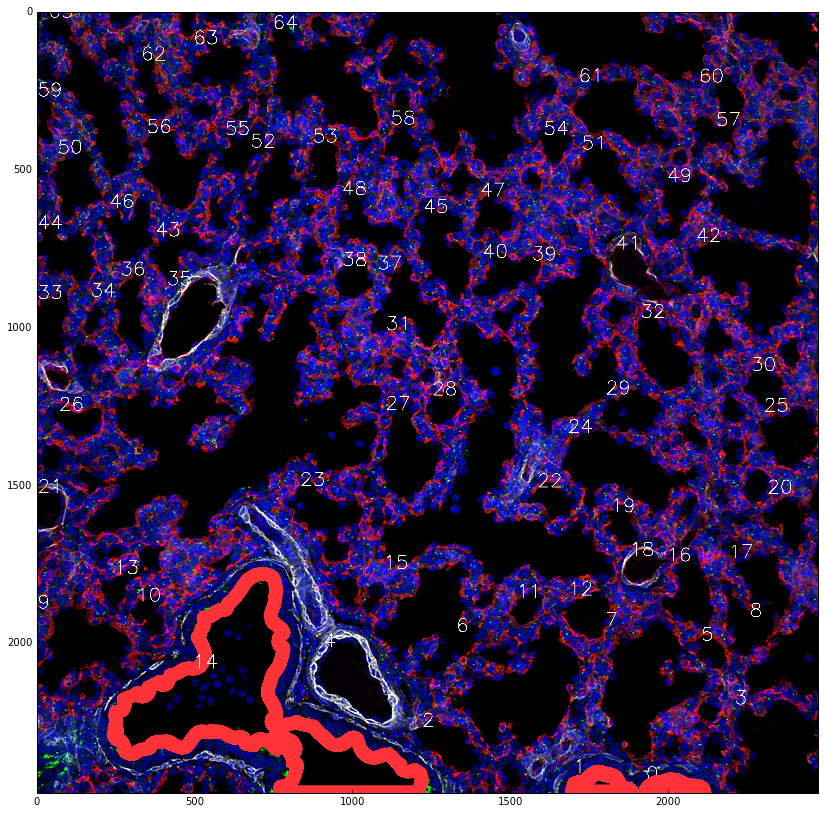

In [56]:
###Improved algorithm
##Identifying Bronchioles from Veins with Red thick lines
filename=str("C:/Users/PABLO ORTIZ/ImageWeek89.png")
orim=cv2.imread(filename)

im = orim
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im = cv2.GaussianBlur(im, (99,99),0)

orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)



# find contours
finalcontours = []
thresh = cv2.inRange(im, np.array([0,0,0]), np.array([25,25,25]))
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    a = cv2.contourArea(contours[i])
    if (a>3000 and a<10000000):
        finalcontours.append(contours[i])

im=orim
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)

for ia in range(0, len(finalcontours)):
        a = cv2.contourArea(finalcontours[ia])
        if a>375000:
            T=75
        elif a>200000:
            T= int(a*0.0002)
        else:
            T=50
        mask = np.zeros(imgray.shape,np.uint8)
        temp2 = cv2.drawContours(mask,finalcontours,ia,(100,100,100),thickness=T, lineType=2,maxLevel = 0)

        cnt=finalcontours[ia]
        cv2.drawContours(mask,[cnt],0,0,-1)#delete the contour area from the mask

        mean_val = cv2.mean(orim,mask = mask)
       

        x,y,w,h = cv2.boundingRect(cnt)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(im,str(ia),(x,y), font, 2,(255,255,255),2)

        if mean_val[0]<20 and mean_val[1]>20:
            temp2 = cv2.drawContours(im,finalcontours,ia,(255,50,55),thickness=T, lineType=1,maxLevel=0)

            print(ia, mean_val, a, T)

plt.figure(figsize=(48, 14))
plt.imshow(im)
plt.figure(figsize=(48, 14))
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
#plt.imshow(orim)
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
cv2.imwrite("Segmented" + filename.split("/")[-1],im)